# Movie Recommender System

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset: [MovieLens 20m Dataset](https://grouplens.org/datasets/movielens/20m/)

In [2]:
!pip install turicreate

     |████████████████████████████████| 92.0MB 32kB/s 
     |████████████████████████████████| 3.5MB 26.0MB/s 
     |████████████████████████████████| 86.4MB 36kB/s 
     |████████████████████████████████| 327kB 39.5MB/s 
     |████████████████████████████████| 3.6MB 28.2MB/s 
     |████████████████████████████████| 2.9MB 31.5MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 3.8MB 30.5MB/s 
     |████████████████████████████████| 450kB 39.4MB/s 
     |████████████████████████████████| 18.3MB 160kB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13716 sha256=188c7ce8980355e3fcaebc3796fdd291b9584f8c9744eb3167b3302b7dabcfb9
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for resampy: filename=resampy-0.2.1-cp37-none-any.whl size=320858 sha256=eac1ba71879ebf1b7bc0ada2982d6cf7c9cab7159e585b045662fc75f219b85d
  Stored in directory:

In [3]:
from turicreate import *

In [4]:
# Importing the header files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import graphlab
import re
from IPython.display import Image

### Read the data from the movielens dataset using the read_csv() function from the pandas library.

In [5]:
# Reading the dataset
ratings = pd.read_csv('/content/drive/MyDrive/dataset/ratings.csv')
movies = pd.read_csv('/content/drive/MyDrive/dataset/movies.csv')
links = pd.read_csv('/content/drive/MyDrive/dataset/links.csv')
scores = pd.read_csv('/content/drive/MyDrive/dataset/genome-scores.csv')
tags = pd.read_csv('/content/drive/MyDrive/dataset/tags.csv')
gnometags = pd.read_csv('/content/drive/MyDrive/dataset/genome-tags.csv')

### Inspecting and cleaning the data

In [6]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [7]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [8]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [9]:
scores.columns

Index(['movieId', 'tagId', 'relevance'], dtype='object')

In [10]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [11]:
gnometags.columns

Index(['tagId', 'tag'], dtype='object')

In [12]:
ratings = ratings.drop(['timestamp'], axis=1)
ratings.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [13]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
# Extracting the year of movie release
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [15]:
print ("Number of missing values:"), movies['year'].isna().sum()

Number of missing values:


(None, 407)

In [16]:
movies = movies.dropna(how='any')

In [17]:
print("Number of missing values:"), movies['year'].isna().sum()

Number of missing values:


(None, 0)

In [18]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [19]:
scores.head()

,movieId,tagId,relevance
0,1,1.0,0.02875
1,1,2.0,0.02375
2,1,3.0,0.06250
3,1,4.0,0.07575
4,1,5.0,0.14075


In [20]:
tags = tags.drop(['timestamp'], axis=1)
tags.head()

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


In [21]:
gnometags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


### Data Visualization

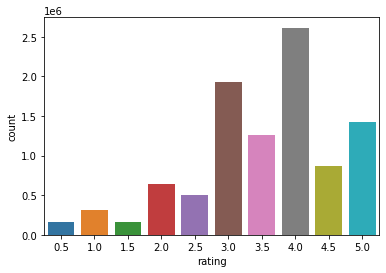

In [22]:
sns.countplot(x=ratings.rating, data=ratings)

rating    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

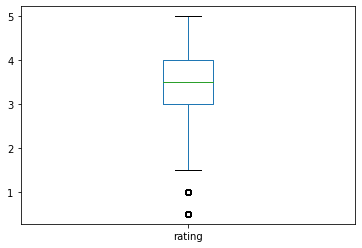

In [23]:
ratings['rating'].plot(kind='box', subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb886960750>]],
      dtype=object)

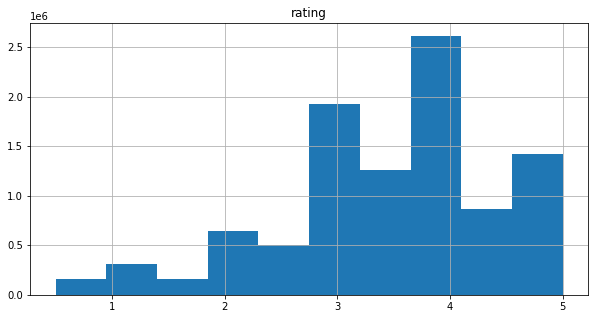

In [24]:
%matplotlib inline
ratings.hist(column='rating', figsize=(10,5))

In [25]:
# Combining the movies and ratings dataframe
combined = pd.merge(movies, ratings)
combined.head()

,movieId,title,genres,year,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,8,4.0


In [26]:
combined = combined.drop(['genres'], axis=1)
print ("Dimensions of dataframe:"), combined.shape

Dimensions of dataframe:


(None, (9870761, 5))

#### Once the data is cleaned, we split the data into training set and test set to prepare it for our machine learning model in a suitable proportion.

In [27]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(combined, test_size=0.25)

In [58]:
print ("Dimensions of training set:"), train.shape 
print ("Dimensions of test set:"), test.shape

Dimensions of training set:
Dimensions of test set:


(None, (2467691, 5))

In [59]:
train.dtypes

movieId      int64
title       object
year        object
userId       int64
rating     float64
dtype: object

In [60]:
train_data = turicreate.SFrame(train)
test_data = turicreate.SFrame(test)

## Simple Popularity Model (recommendations based on popular choices)¶

##### Creating an object of the simple popularity model from the graphlab library on the training set. Simple popularity method is an algorithm that will make recommendations based on its popularity or ratings given to that object from various users. It is based completely upon the object ratings.

In [61]:
# Simple Popularity Model (recommendations based on popular choices)
pop_model = turicreate.popularity_recommender.create(train_data, user_id = 'userId', item_id = 'movieId', target = 'rating')

Warning: Ignoring columns title, year;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 7403070 observations with 64099 users and 42722 items.

Data prepared in: 11.6039s

7403070 observations to process; with 42722 unique items.

In [62]:
# Getting recommendations for the first 5 users
pop_recommend = pop_model.recommend(users = SArray(range(1,6)),k = 5)
pop_recommend.print_rows(num_rows = 25)

+--------+---------+-------+------+
| userId | movieId | score | rank |
+--------+---------+-------+------+
|   1    |  91248  |  5.0  |  1   |
|   1    |  129516 |  5.0  |  2   |
|   1    |  152035 |  5.0  |  3   |
|   1    |  148460 |  5.0  |  4   |
|   1    |  129036 |  5.0  |  5   |
|   2    |  91248  |  5.0  |  1   |
|   2    |  129516 |  5.0  |  2   |
|   2    |  152035 |  5.0  |  3   |
|   2    |  148460 |  5.0  |  4   |
|   2    |  129036 |  5.0  |  5   |
|   3    |  91248  |  5.0  |  1   |
|   3    |  129516 |  5.0  |  2   |
|   3    |  152035 |  5.0  |  3   |
|   3    |  148460 |  5.0  |  4   |
|   3    |  129036 |  5.0  |  5   |
|   4    |  91248  |  5.0  |  1   |
|   4    |  129516 |  5.0  |  2   |
|   4    |  152035 |  5.0  |  3   |
|   4    |  148460 |  5.0  |  4   |
|   4    |  129036 |  5.0  |  5   |
|   5    |  91248  |  5.0  |  1   |
|   5    |  129516 |  5.0  |  2   |
|   5    |  152035 |  5.0  |  3   |
|   5    |  148460 |  5.0  |  4   |
|   5    |  129036 |  5.0  |

## Collaborative Filtering Model (recommendations based on personalized choices)

#### Creating an object of the collaborative filtering model from the graphlab library on the training set. Collaborative filtering algorithm is a personalized algorithm which takes in account what movies users watch after a particular movie which is generally of the same genre. The collaborative filtering algorithm predicts what a user likes based on what other similar users like. It is one of the most popular recommender system algorithm.

In [63]:
# Collaborative Filtering Model
col_filter_model = turicreate.item_similarity_recommender.create(train_data, user_id  ='userId', item_id = 'movieId', target = 'rating', similarity_type = 'pearson')

Warning: Ignoring columns title, year;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 7403070 observations with 64099 users and 42722 items.

Data prepared in: 12.108s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 53.609ms                       | 1.5        |

| 402.183ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 7.30s                               | 0                | 0               |

| 10.33s                              | 4.25             | 1821            |

| 13.35s                              | 8.25             | 3555            |

| 16.31s                              | 12.5             | 5373            |

| 19.35s                              | 17.5             | 7533            |

| 22.30s                              | 21.25            | 9149            |

| 25.32s                              | 25.5             | 10909           |

| 28.31s                              | 29.25            | 12497           |

| 31.30s                              | 33               | 14149           |

| 34.38s                              | 37               | 15886           |

| 37.31s                              | 40.75            | 17460           |

| 40.31s                              | 44.75            | 19121           |

| 43.31s                              | 48.5             | 20787           |

| 46.31s                              | 52.25            | 22333           |

| 49.31s                              | 55.75            | 23896           |

| 52.31s                              | 59.25            | 25399           |

| 55.31s                              | 63               | 26961           |

| 58.32s                              | 66.5             | 28450           |

| 1m 1s                               | 70               | 29959           |

| 1m 4s                               | 73.5             | 31410           |

| 1m 7s                               | 76.75            | 32822           |

| 1m 10s                              | 80               | 34212           |

| 1m 13s                              | 83               | 35554           |

| 1m 16s                              | 86.25            | 36940           |

| 1m 19s                              | 89.5             | 38277           |

| 1m 22s                              | 92.5             | 39567           |

| 1m 25s                              | 95.5             | 40800           |

| 1m 28s                              | 98               | 41964           |

| 2m 11s                              | 100              | 42722           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 132.538s

In [64]:
# Making recommendations for the first 5 users
col_filter_recommend = col_filter_model.recommend(users = SArray(range(1,6)), k = 5)
col_filter_recommend.print_rows(num_rows = 25)

+--------+---------+-------+------+
| userId | movieId | score | rank |
+--------+---------+-------+------+
|   1    |  129516 |  5.0  |  1   |
|   1    |  91248  |  5.0  |  2   |
|   1    |  152035 |  5.0  |  3   |
|   1    |  148460 |  5.0  |  4   |
|   1    |  129036 |  5.0  |  5   |
|   2    |  129516 |  5.0  |  1   |
|   2    |  91248  |  5.0  |  2   |
|   2    |  152035 |  5.0  |  3   |
|   2    |  148460 |  5.0  |  4   |
|   2    |  129036 |  5.0  |  5   |
|   3    |  129516 |  5.0  |  1   |
|   3    |  91248  |  5.0  |  2   |
|   3    |  152035 |  5.0  |  3   |
|   3    |  148460 |  5.0  |  4   |
|   3    |  129036 |  5.0  |  5   |
|   4    |  129516 |  5.0  |  1   |
|   4    |  91248  |  5.0  |  2   |
|   4    |  152035 |  5.0  |  3   |
|   4    |  148460 |  5.0  |  4   |
|   4    |  129036 |  5.0  |  5   |
|   5    |  129516 |  5.0  |  1   |
|   5    |  91248  |  5.0  |  2   |
|   5    |  152035 |  5.0  |  3   |
|   5    |  148460 |  5.0  |  4   |
|   5    |  129036 |  5.0  |

## Pivot table based correlation model

In [65]:
train_data.head()

movieId,title,year,userId,rating
519,RoboCop 3 (1993),1993,40718,1.0
785,Kingpin (1996),1996,10140,4.0
56145,"Mist, The (2007)",2007,33610,2.0
8902,Bug (1975),1975,757,3.5
4447,Legally Blonde (2001),2001,11788,3.0
3826,Hollow Man (2000),2000,63546,0.5
8784,Garden State (2004),2004,2778,4.0
130474,Suite Française (2015),2015,53467,4.0
300,Quiz Show (1994),1994,23263,5.0
2126,Snake Eyes (1998),1998,21555,4.0


In [66]:
test_data.head()

movieId,title,year,userId,rating
111,Taxi Driver (1976),1976,53123,5.0
170403,Going in Style (2017),2017,57846,4.0
1909,"X-Files: Fight theFuture, The (1998) ...",1998,18031,4.0
64614,Gran Torino (2008),2008,9787,2.0
3752,"Me, Myself & Irene (2000)",2000,58424,3.5
1214,Alien (1979),1979,53472,3.5
3117,Ride with the Devil(1999) ...,1999,11266,4.0
1288,This Is Spinal Tap (1984),1984,52524,4.0
89864,50/50 (2011),2011,21328,1.0
2024,"Rapture, The (1991)",1991,1894,2.0


In [90]:
# Splitting combined data else it would cause int 32 bit overflow
X_train = combined.iloc[:1000000,:]
X_test = combined.iloc[1000000:,:]

In [91]:
# Making a pivot table
pivot = X_train.pivot_table(index = ["userId"],columns = ["title"],values = "rating")

In [92]:
pivot.head()

title,Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Addiction, The (1995)","Adventures of Priscilla, Queen of the Desert, The (1994)",Amateur (1994),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Apollo 13 (1995),Assassins (1995),"Awfully Big Adventure, An (1995)",Babe (1995),"Baby-Sitters Club, The (1995)","Babysitter, The (1995)",Backbeat (1993),Bad Boys (1995),Balto (1995),"Basketball Diaries, The (1995)",Batman Forever (1995),Beautiful Girls (1996),Beauty of the Day (Belle de jour) (1967),Bed of Roses (1996),Before Sunrise (1995),Before and After (1996),Before the Rain (Pred dozhdot) (1994),Beyond Bedlam (1993),Beyond Rangoon (1995),Big Bully (1996),"Big Green, The (1995)",Billy Madison (1995),Bio-Dome (1996),"Birdcage, The (1996)",Bitter Moon (1992),Black Sheep (1996),Blue in the Face (1995),Boomerang (1992),...,Three Colors: White (Trzy kolory: Bialy) (1994),Three Wishes (1995),"Tie That Binds, The (1995)",To Die For (1995),To Live (Huozhe) (1994),"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",Tom & Viv (1994),Tom and Huck (1995),Tommy Boy (1995),Total Eclipse (1995),Toy Story (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Two Bits (1995),Two if by Sea (1996),"Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)",Under Siege 2: Dark Territory (1995),Underneath (1995),Unforgettable (1996),Unstrung Heroes (1995),Unzipped (1995),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Vanya on 42nd Street (1994),Village of the Damned (1995),Virtuosity (1995),Waiting to Exhale (1995),"Walk in the Clouds, A (1995)","Walking Dead, The (1995)","War, The (1994)",Waterworld (1995),What's Eating Gilbert Grape (1993),When Night Is Falling (1995),While You Were Sleeping (1995),"White Balloon, The (Badkonake sefid) (1995)",White Man's Burden (1995),White Squall (1996),Wild Bill (1995),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,4.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
movie_name = input()

Angels and Insects (1995)


In [94]:
# Find correlation between the input movie and other movies
print("Movies similar to the given movies are:")
movie_watched = pivot[movie_name]
similarity = pivot.corrwith(movie_watched)  
similarity = similarity.sort_values(ascending=False)
similarity.head()

Movies similar to the given movies are:


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Angels and Insects (1995)                  1.000000
Shopping (1994)                            1.000000
Beyond Bedlam (1993)                       0.874383
New York Cop (Nyû Yôku no koppu) (1993)    0.870572
Cure, The (1995)                           0.754689
dtype: float64